# "Fun with Loot Boxes" Lab

> Author: Caroline Schmitt, Matt Brems

### Scenario:

You're an analyst for [Zynga](https://en.wikipedia.org/wiki/Zynga), a gaming studio working on an event for an MMO (massively multiplayer online) game. This event is going to include **loot boxes**.

<img src="https://vignette.wikia.nocookie.net/2007scape/images/0/06/Culinaromancer%27s_chest.png/revision/latest?cb=20180403231423" alt="drawing" width="150"/> 

A loot box is basically a treasure chest in a game. This loot box can be opened to reveal a variety of items: some items are very rare and valuable, other items are common and less valuable. (You may consult [the esteemed Wikipedia](https://en.wikipedia.org/wiki/Loot_box) for a more extensive definition.)

In our specific game, suppose that loot boxes can be obtained in one of two ways: 
- After every three hours of playing the game, a user will earn one loot box.
- If the user wishes to purchase a loot box, they may pay $1 (in real money!) for a loot box.

These loot boxes are very good for our business!
- If a player earns a loot box, it means they are spending lots of time on the game. This often leads to advertisement revenue, they may tell their friends to join the game, etc.
- If the player purchases a loot box, it means we've earned $1 from our customer.

Suppose each loot box is opened to reveal either:
- magical elixir (super rare, very valuable), or
- nothing.

Whether each loot box contains the elixir or nothing is **random**. Our boss wants some guidance on what sort of randomness to use on these loot boxes! 
- If the magical elixir is too rare, then users may not be motivated to try to get them, because they believe they'll never find the magical elixir.
- If the magical elixir is too common, then users may not be motivated to try to get them, because the game has so much of the magical elixir that it isn't worthwhile to try to get it.

However, our boss isn't a math-y type person! When explaining things to our boss, we need to explain the impact of our choices on the game as concretely as possible.

### Version 1
In our first version of the game, we'll say that loot boxes contain magical elixir 15% of the time and nothing 85% of the time.

#### 1. Our boss asks, "If a user buys 100 loot boxes, how many elixirs will they get?" How would you respond?

I would respond by telling him that there is a 15% chance of getting an elixr with every purchase. If the user buys 100 loot boxes this increases his chances and he might get 15 elixr's. 



**NOTE**: When your Jupyter notebook is open, double-click on this Markdown cell! You can delete this text and put your answer to the previous problem in here.

#### 2. Our boss asks, "How many loot boxes does someone have to purchase in order to definitely get elixir?" How would you respond?

The probability of getting a lootbox is the highest when the user buys atleast 15 loot boxes. I would define definitely as 99.9999% assurance of an elixr. This can be found by using a binomial distribution. The cdf becomes 0.99 at 24 boxes and 0.999959 at boxes 30. Therefore I would say if u want a 99.9999% chance of getting an elixr buy atleast 30 boxes.


In [1]:
#Importing Libraries
from scipy import stats
import matplotlib.pyplot as plt
#Setting variable values
prob_elixr = 0.15
n_buys = 100

#Setting the distribution
elixr_dist = stats.binom(n_buys, prob_elixr)
#probability mass function
elixr_dist.pmf(100)
elixr_outcomes = list(range(0,100))
plt.bar(elixr_outcomes, elixr_dist.pmf(elixr_outcomes));
plt.xlabel('Number of Elixrs');
plt.ylabel('Probability of Elixr');

Text(0, 0.5, 'Cumulative Probability of Elixr')

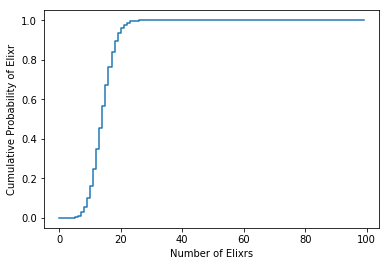

In [2]:
plt.step(elixr_outcomes, elixr_dist.cdf(elixr_outcomes));
plt.xlabel('Number of Elixrs')
plt.ylabel('Cumulative Probability of Elixr')

#### 3. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" This is a bit more complicated, so let's break it down before answering.

#### 3a. Let's suppose my random variable $X$ counts up how many elixirs I observe out of my 100 loot boxes. Why is $X$ a discrete random variable?

X is a discrete random variable as it can be counted to the exact number

**NOTE**: When your Jupyter notebook is open, double-click on this Markdown cell! You can delete this text and put your answer to the previous problem in here.

#### 3b. Recall our discrete distributions: discrete uniform, Bernoulli, binomial, Poisson. Let's suppose my random variable $X$ counts up how many elixirs I observe out of my 100 loot boxes. What distribution is best suited for $X$? Why?

The Binomial distribution is much suited for this variable as it is a Bernoulli with many trials. The lootbox being a trial to get an elixr.

**NOTE**: When your Jupyter notebook is open, double-click on this Markdown cell! You can delete this text and put your answer to the previous problem in here.

#### 3c. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Use the probability mass function to answer the boss' question.

Text(0, 0.5, 'Probability of Elixr')

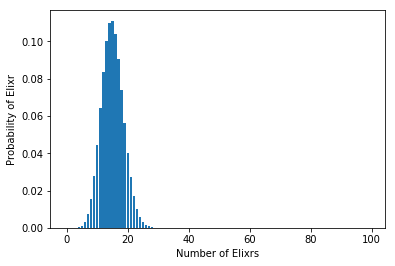

In [3]:
# Show your work; leave your answer in a comment.
import numpy as np
prob_elixr = 0.15
n_buys = 100

elixr_dist = stats.binom(n_buys, prob_elixr)
#probability mass function
elixr_dist.pmf(100)


elixr_outcomes = list(range(0,100))
plt.bar(elixr_outcomes, elixr_dist.pmf(elixr_outcomes))
plt.xlabel('Number of Elixrs')
plt.ylabel('Probability of Elixr')

#### 3d. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Use the cumulative distribution function to answer the boss' question.

In [4]:
# Show your work; leave your answer in a comment.
chance = 1 - elixr_dist.cdf(20)
chance

0.06631976581888166

#### 3e. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Answer your boss' question. *Remember that your boss is not a math-y person!*

In [5]:
print(f"The chance that a user gets more than 20 elixirs is {np.round(chance*100,3)} %")

The chance that a user gets more than 20 elixirs is 6.632 %


#### 4. Your boss wants to know how many people purchased how many loot boxes last month. 
> For example, last month, 70% of users did not purchase any loot boxes. 10% of people purchased one loot box. 5% of people purchased two loot boxes... and so on.

#### 4a. Recall our discrete distributions: discrete uniform, Bernoulli, binomial, Poisson. Let's suppose my random variable $Y$ counts up how many loot boxes each person purchased through the game last month. What distribution is best suited for $Y$? Why?

Since this is a periodic countable measurement a poisson distribution is best suited for this distribution.

#### 4b. Suppose that, on average, your customers purchased 2.7 loot boxes last month. In order for your revenue to be at least $500,000, at least how many users would you need on your platform? (Round your answer up to the nearest thousand.) 

In [6]:
# Show your work; leave your answer in a comment.
import math
avg_lootboxes_per_customer = 2.7
avg_cost_per_customer = 2.7 #Since cost of a lootbox is 1 dollar
Revenue = 500000

n_customers = math.ceil((Revenue/avg_cost_per_customer)/1000) * 1000
print(f"The users needed on the platform are {n_customers}")

The users needed on the platform are 186000


#### 4c. Assume that your platform has the numer of users you mentioned in your last answer. Suppose that your platform calls anyone who purchases 5 or more loot boxes in a month a "high value user." How much money do you expect to have earned from "high value users?" How about "low value users?"

In [7]:
# Show your work; leave your answer in a comment.
n_customers = 186000
avg_lootboxes = 2.7
revenue = 500000
lootboxes_dist = stats.poisson(avg_lootboxes)

#High Value users buying 5 or more
#inspired by Patricks code
boxes_h = list(range(5,20))
revenue_h = 0
for box in boxes_h:
    revenue_h += lootboxes_dist.pmf(box) * n_customers * box
print (f"The money from high value users is $ {round(revenue_h,2)}")

#Low Value users buying 5 or more
#inspired by Patricks code
boxes_l = list(range(1,5))
revenue_l = 0
for box in boxes_l:
    revenue_l += lootboxes_dist.pmf(box) * n_customers * box
print (f"The money from low value users is $ {round(revenue_l,2)}")


The money from high value users is $ 143582.91
The money from low value users is $ 358617.09


#### 4d. Suppose that you want to summarize how many people purchased how many loot boxes last month for your boss. Since your boss isn't math-y, what are 2-4 summary numbers you might use to summarize this for your boss? (Your answers will vary here - use your judgment!)

The revenue last month was 500000. In order to achieve this revenue 186,000 customers bought lootboxes. The high value customers who bought 5 or more boxes produced approximately 143582.91 dollars. The low value customers who bought less than 5 boxes produced approximately 358617.09 dollars.

#### 5. Your boss asks "How many loot boxes does it take before someone gets their first elixir?" Using `np.random.choice`, simulate how many loot boxes it takes somone to get their first elixir. 
- Start an empty list.
- Use control flow to have someone open loot boxes repeatedly.
- Once they open a loot box containing an elixir, record the number of loot boxes it took in the empty list.
- Repeat this process 100,000 times. 

This simulates how long it takes for someone to open a loot box containing elixir. Share the 5th, 25th, 50th, 75th, and 95th percentiles.

> You may find [this documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html)  and [this documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.percentile.html) helpful.

In [8]:
#Creating a list of possible outcomes with a 15% chance of elixr's
possible_outcomes = [0]*17 +[1]*3
possible_outcomes

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]

In [9]:
successes = []  
dist = []
for i in range(100000):         
    elixr = np.random.choice(possible_outcomes)
    successes.append(elixr)
    if elixr == 1:
        dist.append(len(successes))
        successes =[]
    else:
        pass
print(f"In 100000 buys of lootboxes {len(dist)} contained elixrs's")
print(f"The average number of tries it took to get an elixr was {round(np.mean(dist))}")

In 100000 buys of lootboxes 15022 contained elixrs's
The average number of tries it took to get an elixr was 7.0


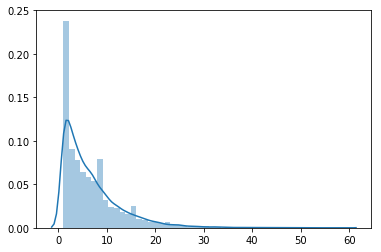

In [10]:
#Visualizing the distribution
import seaborn as sns
sns.distplot(dist)

In 100000 buys of lootboxes 14974 contained elixrs's
The average number of tries it took to get a lootbox was 7.0

### Version 2

After a substantial update to the game, suppose every loot box can be opened to reveal *one of four different* items:
- magical elixir (occurs 1% of the time, most valuable)
- golden pendant (occurs 9% of the time, valuable)
- steel armor (occurs 30% of the time, semi-valuable)
- bronze coin (occurs 60% of the time, least valuable)

#### 6. Suppose you want repeat problem 5 above, but do that for the version 2 loot boxes so you can track how many loot boxes are needed to get each item? (e.g. You'd like to be able to say that on average it takes 10 trials to get a golden pendant, 3 trials to get steel armor, and so on.) What Python datatype is the best way to store this data? Why?

**NOTE**: When your Jupyter notebook is open, double-click on this Markdown cell! You can delete this text and put your answer to the previous problem in here.

In [11]:
#Assigning values to each outcome
bronze_coin = 0
steel_armor = 1
golden_pendant = 2
magical_elixr = 3

#Creating a list of possible outcomes
possible_outcomes = [bronze_coin]*60 +[steel_armor]*30 + [golden_pendant]*9 + [magical_elixr]*1

#Creating empty lists for each out
successes = []  
bronze_dist = []
steel_dist = []
golden_dist = []
magical_dist = []
for i in range(100000):         
    elixr = np.random.choice(possible_outcomes)
    successes.append(elixr)
    if elixr == bronze_coin:
        bronze_dist.append(i)
    elif elixr == steel_armor:
        steel_dist.append(i)
    elif elixr == golden_pendant:
        golden_dist.append(i)
    else:
        magical_dist.append(i)

In [12]:
#creating a function to compute the average tries it takes to get an item
def list_distance(b):
    distance = []
    for i in range(len(b)-1):
        dooram = b[i+1] - b[i]
        distance.append(dooram)
    return np.mean(distance)


In [13]:
print(f"The average number of tries it took to get a bronze_coin was {round(list_distance(bronze_dist))}")
print(f"The average number of tries it took to get a stell_armor was {round(list_distance(steel_dist))}")
print(f"The average number of tries it took to get a golden_pendant was {round(list_distance(golden_dist))}")
print(f"The average number of tries it took to get a magical_elixr was {round(list_distance(magical_dist))}")

The average number of tries it took to get a bronze_coin was 2.0
The average number of tries it took to get a stell_armor was 3.0
The average number of tries it took to get a golden_pendant was 11.0
The average number of tries it took to get a magical_elixr was 102.0


#### 7. Suppose you and your boss want to measure whether "Version 2" is better than "Version 1." What metrics do you think are important to measure? (Your answers will vary here - use your judgment!)

Since in the new version every lootbox assures an item, a user does not feel that the buy/gain of a lootbox was worthless. This keeps the users engaged as opposed to dejected in version 1 when the user only has a 15% chance of getting a valuable elixr in 100 tries. The important metrics to be measured are:

*Probability of getting a valuable item

*Number of users buying lootboxes

*Revenue earned in the month with version 2
